In [ ]:
!pip install pycryptodome

In [45]:
import os
import time 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_ECB)
    cipher_text = cipher.encrypt(plain_text)
    return cipher_text

def aes_decrypt(cipher_text, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_text = cipher.decrypt(cipher_text)
    return decrypted_text

# Example usage
key = get_random_bytes(16)  # 16 bytes key for AES-128
text = b'This is a secret'
encrypted = aes_encrypt(text, key)
decrypted = aes_decrypt(encrypted, key)

print("Original Text:", text)
print("Encrypted:", encrypted)
print("Decrypted Text:", decrypted)

Original Text: b'This is a secret'
Encrypted: b'\xcd\xcc\xcf\x04\xf4\x8c\x8cd\xc6\x95\xcc\x13P8.\xad'
Decrypted Text: b'This is a secret'


In [7]:
from Crypto.Cipher import DES
from Crypto.Random import get_random_bytes

def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_ECB)
    cipher_text = cipher.encrypt(plain_text)
    return cipher_text

def des_decrypt(cipher_text, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted_text = cipher.decrypt(cipher_text)
    return decrypted_text

# Example usage
key = get_random_bytes(8)  # 8 bytes key for DES
text = b'This is a secret'
encrypted = des_encrypt(text, key)
decrypted = des_decrypt(encrypted, key)

print("Original Text:", text)
print("Encrypted:", encrypted)
print("Decrypted Text:", decrypted)

Original Text: b'This is a secret'
Encrypted: b'\xeae]\x95\xf8;E\x9d\xe9\x86\xe3\x0bR\xa1\xcft'
Decrypted Text: b'This is a secret'


In [28]:
dataPaths= [ 
            r"E:/Encryption Analysis/file.txt" , 
            r"E:/Encryption Analysis/file2.txt" , 
            r"E:/Encryption Analysis/file3.txt"
          ]

In [66]:
filesSizes= [ ] 

In [67]:
for dataPath in dataPaths: 
    try: 
        size= os.path.getsize(dataPath)
        filesSizes.append(size) 
        print(f"file path {dataPath} found with size {size}")
    except FileNotFoundError: 
        print(f"file within path {dataPath} not found") 
    except Exception as e: 
        print(f"{e}") 
    else: 
        print("get files sizes successfully without any errors") 
    finally: 
        print("end of get file size process") 

file path E:/Encryption Analysis/file.txt found with size 648314880
get files sizes successfully without any errors
end of get file size process
file path E:/Encryption Analysis/file2.txt found with size 38445056
get files sizes successfully without any errors
end of get file size process
file path E:/Encryption Analysis/file3.txt found with size 1069248
get files sizes successfully without any errors
end of get file size process


In [30]:
aesKey= get_random_bytes(16) 

In [38]:
aesRunAvgTimes= [ ] 

In [39]:
for dataPath in dataPaths: 
    res= 0 
    print(dataPath)
    for i in range(0 , 15 ,1): 
        with open(dataPath , "rb") as data: 
            content= data.read()
            startTime= time.time() 
            encrypted = aes_encrypt(content, aesKey)
            decrypted = aes_decrypt(encrypted, aesKey)
            endTime= time.time() 
            res+= (endTime - startTime) 
    aesRunAvgTimes.append(res / 15) 

E:/Encryption Analysis/file.txt
E:/Encryption Analysis/file2.txt
E:/Encryption Analysis/file3.txt


In [40]:
desKey= get_random_bytes(8)  

In [41]:
desRunAvgTimes= [ ] 

In [42]:
for dataPath in dataPaths: 
    res= 0 
    print(dataPath)
    for i in range(0 , 15 ,1): 
        with open(dataPath , "rb") as data: 
            content= data.read()
            startTime= time.time() 
            encrypted = des_encrypt(content, desKey)
            decrypted = des_decrypt(encrypted, desKey)
            endTime= time.time() 
            res+= (endTime - startTime) 
    desRunAvgTimes.append(res / 15) 

E:/Encryption Analysis/file.txt
E:/Encryption Analysis/file2.txt
E:/Encryption Analysis/file3.txt


In [46]:
aesRunAvgTimes

[6.308385356267293, 0.36083997090657555, 0.012891642252604167]

In [47]:
desRunAvgTimes

[91.1323260307312, 5.451704947153727, 0.23735555013020834]

In [68]:
aesDict= {"File Size In Bytes": filesSizes , "Key Length": [128 for i in range(len(filesSizes))], "Avg Cpu": aesRunAvgTimes}

In [69]:
desDict= {"File Size In Bytes": filesSizes , "Key Length": [64 for i in range(len(filesSizes))], "Avg Cpu": desRunAvgTimes}

In [70]:
aesDF= pd.DataFrame(aesDict)

In [71]:
desDF= pd.DataFrame(desDict) 

In [72]:
aesDF.head()

,File Size In Bytes,Key Length,Avg Cpu
0,648314880,128,6.308385
1,38445056,128,0.360840
2,1069248,128,0.012892


In [73]:
desDF.head()

,File Size In Bytes,Key Length,Avg Cpu
0,648314880,64,91.132326
1,38445056,64,5.451705
2,1069248,64,0.237356


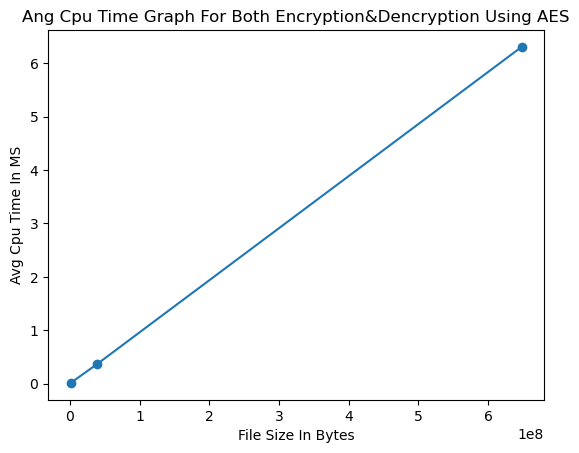

In [78]:
plt.plot(filesSizes , aesRunAvgTimes , marker= "o" , label= "aes avg cpu line") 
plt.title("Ang Cpu Time Graph For Both Encryption&Dencryption Using AES") 
plt.xlabel("File Size In Bytes") 
plt.ylabel("Avg Cpu Time In MS")
plt.show() 

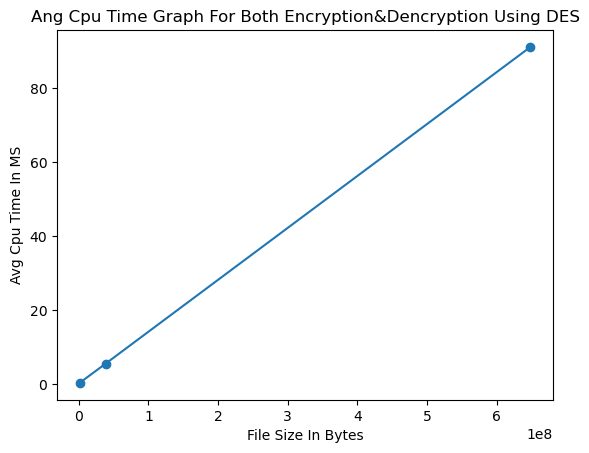

In [81]:
plt.plot(filesSizes , desRunAvgTimes , marker= "o" , label= "des avg cpu line") 
plt.title("Ang Cpu Time Graph For Both Encryption&Dencryption Using DES") 
plt.xlabel("File Size In Bytes") 
plt.ylabel("Avg Cpu Time In MS")
plt.show()

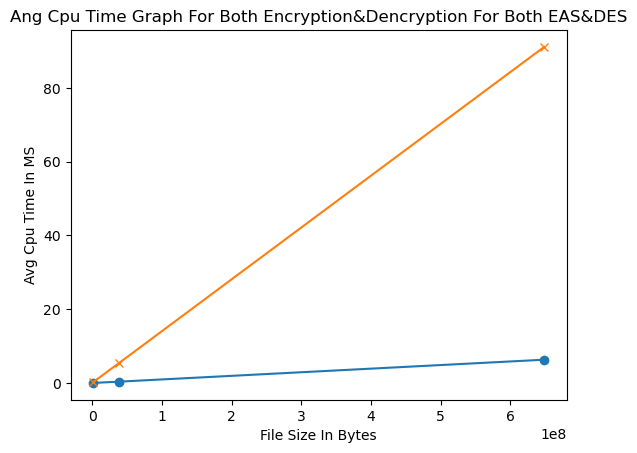

In [82]:
plt.plot(filesSizes , aesRunAvgTimes , marker= "o" , label= "aes avg cpu line") 
plt.plot(filesSizes , desRunAvgTimes , marker= "x" , label= "des avg cpu line") 
plt.title("Ang Cpu Time Graph For Both Encryption&Dencryption For Both EAS&DES") 
plt.xlabel("File Size In Bytes") 
plt.ylabel("Avg Cpu Time In MS")
plt.show()       